# 인구 데이터 분석

## 1. 인구수 출력

In [1]:
import csv
path_age = './data/age.csv'
f = open(path_age, encoding='euc_kr')
data = csv.reader(f)

header = next(data)

result= []
for row in data:
    if '산격3' in row[0]:
        for data in row[3:]:
            result.append(data)
        
print(result)
f.close()

['13', '9', '19', '26', '22', '26', '24', '35', '16', '33', '30', '38', '37', '31', '38', '40', '35', '49', '127', '179', '193', '250', '345', '371', '351', '339', '298', '268', '231', '226', '205', '161', '158', '123', '90', '87', '81', '85', '75', '83', '106', '87', '112', '100', '68', '98', '92', '105', '117', '115', '109', '104', '131', '117', '114', '137', '124', '116', '108', '133', '120', '171', '158', '127', '135', '109', '129', '118', '102', '107', '103', '79', '98', '95', '84', '82', '44', '67', '55', '74', '46', '53', '61', '35', '39', '32', '39', '19', '18', '12', '10', '12', '8', '9', '2', '3', '0', '3', '0', '0', '1']


## 2. 대구시 산격3동의 인구 분포 그래프 그리기

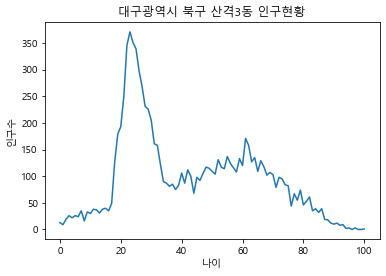

In [2]:
import csv
import matplotlib.pyplot as plt
import re
import platform

f	=	open(path_age,	encoding='euc_kr')
data	=	csv.reader(f)
result	=	[]
city = ''

for row in data:
    if '산격3' in row[0]:
        str_list = re.split('[()]', row[0]) # re.split(구분조건,대상) # [0]: 대구광역시 북구 산격3동
        city = str_list[0]
        for data in row[3:] : # 0세부터 100세 이상까지 데이터
            result.append(int(data)) # 숫자로 변환
f.close()

if platform.system() =='Windows':
    plt.rc('font',family = 'Malgun Gothic')
else:
    plt.rc('font',	family='AppleGothic')

plt.title('{0} 인구현황'.format(city))
plt.xlabel('나이')
plt.ylabel('인구수')
plt.style.use('ggplot')
plt.plot(result) 
plt.show()   

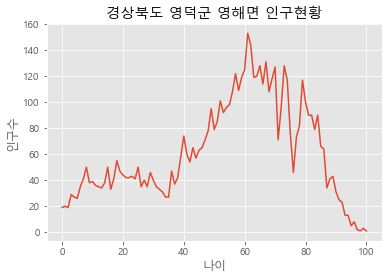

In [4]:
import csv
import matplotlib.pyplot as plt
import re
import platform

f	=	open(path_age,	encoding='euc_kr')
data	=	csv.reader(f)
result	=	[]
city = ''

for row in data:
    if '영해면' in row[0]:
        str_list = re.split('[()]', row[0]) # re.split(구분조건,대상)
                                            # [0]: 대구광역시 북구 산격3동
        city = str_list[0]
        for data in row[3:] : # 0세부터 100세 이상까지 데이터
            result.append(int(data)) # 숫자로 변환
f.close()

if platform.system() =='Windows':
    plt.rc('font',family = 'Malgun Gothic')
else:
    plt.rc('font',	family='AppleGothic')

plt.title('{0} 인구현황'.format(city))
plt.xlabel('나이')
plt.ylabel('인구수')
plt.style.use('ggplot')
plt.plot(result) 
plt.show()   

## 3. 정규식을 사용한 문자열 분리
- re.split(패턴, 문자열, [최대분할개수])

In [5]:
import re

city = '대구광역시 북구 산격3동(2723063000)'
str_list = re.split('[()]', city)

print(len(str_list))
print(str_list[0])
for i in range(len(str_list)):
    print(f'[{i}]:{str_list[i]}')
    
s = 'apple orange:banana,tomato;melon'

fruits = re.split('[ ,:;]',s) 
print(fruits)   

3
대구광역시 북구 산격3동
[0]:대구광역시 북구 산격3동
[1]:2723063000
[2]:
['apple', 'orange', 'banana', 'tomato', 'melon']


# 4. 인구 구조 그래프 함수 구현 

  0세:   13명   1세:    9명   2세:   19명   3세:   26명   4세:   22명   5세:   26명   6세:   24명   7세:   35명   8세:   16명   9세:   33명 
 10세:   30명  11세:   38명  12세:   37명  13세:   31명  14세:   38명  15세:   40명  16세:   35명  17세:   49명  18세:  127명  19세:  179명 
 20세:  193명  21세:  250명  22세:  345명  23세:  371명  24세:  351명  25세:  339명  26세:  298명  27세:  268명  28세:  231명  29세:  226명 
 30세:  205명  31세:  161명  32세:  158명  33세:  123명  34세:   90명  35세:   87명  36세:   81명  37세:   85명  38세:   75명  39세:   83명 
 40세:  106명  41세:   87명  42세:  112명  43세:  100명  44세:   68명  45세:   98명  46세:   92명  47세:  105명  48세:  117명  49세:  115명 
 50세:  109명  51세:  104명  52세:  131명  53세:  117명  54세:  114명  55세:  137명  56세:  124명  57세:  116명  58세:  108명  59세:  133명 
 60세:  120명  61세:  171명  62세:  158명  63세:  127명  64세:  135명  65세:  109명  66세:  129명  67세:  118명  68세:  102명  69세:  107명 
 70세:  103명  71세:   79명  72세:   98명  73세:   95명  74세:   84명  75세:   82명  76세:   44명  77세:   67명  78세:   55명  79세:   74명 
 80세:   46명  81세:   53명  82세:   

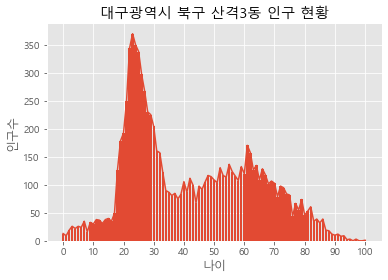

In [6]:
import matplotlib.font_manager as fm

# 지역 이름 저장 함수
def parse_district_name(district):
    district_name = re.split('[()]',district)
    return district_name[0]

# 연령별 인구수 출력 함수
def print_population(population):
    
    for i in range(len(population)):
        print('{0:3d}세: {1:4d}명'.format(i, population[i]), end=' ')
        if (i +1)% 10==0:
            print()
            
# 그래프 그리기 함수
def draw_population(district_name, population_list):
    if platform.system() == 'Windows':
        font_name = fm.FontProperties(fname="c:\Windows\Fonts\malgun.ttf").get_name()
        plt.rc('font',	family=font_name)
    else:
        plt.rc('font',	family='AppleGothic')       
    
    plt.style.use('ggplot')
    plt.title('{} 인구 현황'.format(district_name))
    plt.xlabel('나이')
    plt.ylabel('인구수')
    plt.bar(range(101),	population_list)
    plt.xticks(range(0,	101,	10))	#	0세 ~	100세 이상
    plt.plot(population_list)
    plt.show()    

#    
def	get_population(district):
    f	=	open(path_age,	encoding='euc_kr')
    data	=	csv.reader(f)
    header	=	next(data)	#	헤더 정보 건너뜀
    population_list =	[]
    full_district_name =	''
    for	row	in	data:
        if	district	in	row[0]:
            full_district_name =	parse_district_name(row[0])	#	(시 구 동)	이름만 분리
            for	data	in	row[3:]:
                if	','	in	data:
                    data	=	data.replace(',','')	#	천단위 콤마 제거
                population_list.append(int(data))

    f.close()
    print_population(population_list)
    draw_population(full_district_name,	population_list)

district	=	input('인구 구조를 알고 싶은 지역의 이름(읍면동 단위)을 입력하세요:	')
get_population(district)   

# 5. 투표 가능 인구수 분석

대구광역시  	전체 인구수:2,375,306명,	투표 가능 인구수:	2,042,207명


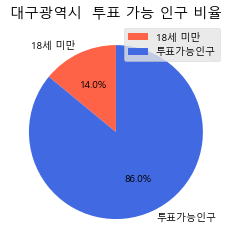

In [7]:
def parse_city_name(city):
    city_name =	re.split('[()]', city)#	[0]:	행정구역 이름,	[1]:	코드 번호
    return	city_name[0]

def draw_piechart(city_name, city_population, voting_population ):
    non_voting_population = city_population - voting_population
    population = [non_voting_population, voting_population]
    
    if	platform.system()	==	'Windows':
        plt.rc('font',	family='Malgun Gothic')
    else:
        plt.rc('font',	family='AppleGothic')
        
    color = ['tomato', 'royalblue']
    plt.pie(population, labels =["18세 미만" ,"투표가능인구"], autopct='%.1f%%', colors=color,startangle =90)

    plt.legend()
    plt.title(city_name + '투표 가능 인구 비율') 
    plt.show()

def get_voting_population(city):
    f	=	open(path_age,	encoding='euc_kr')
    data	=	csv.reader(f)
    header	=	next(data)	#	헤더 정보 건너뜀
    city_name = ''
    city_population =	0	#	도시 전체 인구수
    voting_population =	0 #	투표 가능 인구수
    
    for	row	in	data:
        if	city	in	row[0]:
            city_population =	row[1]
            if	','	in	city_population: #	도시 전체 인구수에서 천단위 콤마 제거
                city_population =	city_population.replace(',',	'')
            city_population =	int(city_population)
            city_name =	parse_city_name(row[0])

            for	data	in	row[21:]:
                if	','	in	data:
                    data	=	data.replace(',','')	#	천단위 콤마 제거
                voting_num =	int(data)
                voting_population +=	voting_num #	누적된 투표 가능 인구수
            break
    f.close()

    print('{}	전체 인구수:{:,}명,	투표 가능 인구수:	{:,}명'. format(city_name,	city_population,	voting_population))
    draw_piechart(city_name,	city_population,	voting_population)

city = input('투표 가능 인구수를 확인할 도시이름을 입력하시오:	')
get_voting_population(city)

# 6. gender.csv 데이터 분석

In [13]:
import	csv
path_gender = './data/gender.csv'        

f	=	open(path_gender,	encoding='euc_kr')
data	=	csv.reader(f)
header	=	next(data)

for	i in range(len(header)):
    print('[{0:4d}]:	{1}'.format(i,	header[i]),	end=',	')
    if	(i+1)	%	5	==	0:
        print()
f.close()

jeju_male='336,994'
seoul_male = '4,762,711'
# 자릿수 문자를 없앰(replace 사용)
seoul_male = int(seoul_male.replace(',', ''))
print("서울 남자수: ", seoul_male, type(seoul_male)) 

jeju_male = int(jeju_male.replace(',', ''))
print("제주 남자수: ", jeju_male, type(jeju_male))

print(seoul_male)

[   0]:	행정구역,	[   1]:	2022년06월_계_총인구수,	[   2]:	2022년06월_계_연령구간인구수,	[   3]:	2022년06월_계_0세,	[   4]:	2022년06월_계_1세,	
[   5]:	2022년06월_계_2세,	[   6]:	2022년06월_계_3세,	[   7]:	2022년06월_계_4세,	[   8]:	2022년06월_계_5세,	[   9]:	2022년06월_계_6세,	
[  10]:	2022년06월_계_7세,	[  11]:	2022년06월_계_8세,	[  12]:	2022년06월_계_9세,	[  13]:	2022년06월_계_10세,	[  14]:	2022년06월_계_11세,	
[  15]:	2022년06월_계_12세,	[  16]:	2022년06월_계_13세,	[  17]:	2022년06월_계_14세,	[  18]:	2022년06월_계_15세,	[  19]:	2022년06월_계_16세,	
[  20]:	2022년06월_계_17세,	[  21]:	2022년06월_계_18세,	[  22]:	2022년06월_계_19세,	[  23]:	2022년06월_계_20세,	[  24]:	2022년06월_계_21세,	
[  25]:	2022년06월_계_22세,	[  26]:	2022년06월_계_23세,	[  27]:	2022년06월_계_24세,	[  28]:	2022년06월_계_25세,	[  29]:	2022년06월_계_26세,	
[  30]:	2022년06월_계_27세,	[  31]:	2022년06월_계_28세,	[  32]:	2022년06월_계_29세,	[  33]:	2022년06월_계_30세,	[  34]:	2022년06월_계_31세,	
[  35]:	2022년06월_계_32세,	[  36]:	2022년06월_계_33세,	[  37]:	2022년06월_계_34세,	[  38]:	2022년06월_계_35세,	[  39]:	2022년06월_계_36세,	
[  40]:	2022년06월_계_37세,	[  41]:	2022년06월_계_38세,

# 7. 연령별 성별 데이터 시각화: 항아리 모양

남성 총인구수:	 -4977
  0세:	  -7명	  1세:	  -3명	  2세:	  -9명	  3세:	 -11명	  4세:	 -11명	  5세:	 -13명	  6세:	 -12명	  7세:	 -25명	  8세:	  -6명	  9세:	 -17명	
 10세:	 -17명	 11세:	 -21명	 12세:	 -19명	 13세:	 -17명	 14세:	 -17명	 15세:	 -18명	 16세:	 -17명	 17세:	 -23명	 18세:	 -72명	 19세:	 -81명	
 20세:	 -63명	 21세:	 -89명	 22세:	-154명	 23세:	-205명	 24세:	-206명	 25세:	-197명	 26세:	-181명	 27세:	-167명	 28세:	-151명	 29세:	-135명	
 30세:	-140명	 31세:	-113명	 32세:	 -96명	 33세:	 -80명	 34세:	 -54명	 35세:	 -63명	 36세:	 -52명	 37세:	 -53명	 38세:	 -45명	 39세:	 -49명	
 40세:	 -59명	 41세:	 -51명	 42세:	 -70명	 43세:	 -60명	 44세:	 -39명	 45세:	 -70명	 46세:	 -52명	 47세:	 -64명	 48세:	 -58명	 49세:	 -59명	
 50세:	 -55명	 51세:	 -62명	 52세:	 -78명	 53세:	 -67명	 54세:	 -65명	 55세:	 -58명	 56세:	 -74명	 57세:	 -51명	 58세:	 -51명	 59세:	 -59명	
 60세:	 -58명	 61세:	 -80명	 62세:	 -73명	 63세:	 -58명	 64세:	 -71명	 65세:	 -54명	 66세:	 -59명	 67세:	 -51명	 68세:	 -53명	 69세:	 -49명	
 70세:	 -45명	 71세:	 -31명	 72세:	 -37명	 73세:	 -38명	 74세:	 -39명	 75세:	 -40명	 76세:	 -13명	 77세:	 -24명	 78세:	 -26명	 79세:	 -29명	
 80세:	 -18명	 81세

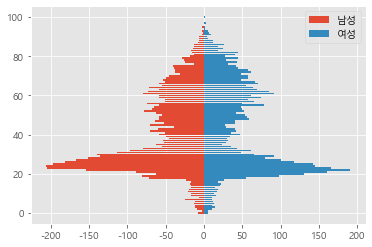

In [ ]:
def	print_population(population):
    # 특정 지역의 인구 현황을 화면에 출력함

    for	i in	range(len(population)):
        print('{0:3d}세:	{1:4d}명'.format(i,	population[i]),	end='	')
        if	(i +	1)	%	10	==	0:
            print()
    print()
    
def	draw_geneder_population(male_num_list,	female_num_list):
    if	platform.system()	==	'Windows':
        plt.rc('font',	family='Malgun Gothic')
    else:
        plt.rc('font',	family='AppleGothic')

    #	barh(y축 범위,	data)
    plt.barh(range(len(male_num_list)),	male_num_list,	label='남성')
    plt.barh(range(len(female_num_list)),	female_num_list,	label='여성')
    plt.rcParams['axes.unicode_minus']	=	False
    plt.legend()
    plt.show()

def	calculate_population():
    f	=	open(path_gender,	encoding='euc_kr')
    data	=	csv.reader(f)
    male_num_list =	[]
    female_num_list =	[]

    district	=	input('지역(동)	이름을 입력하세요:	')
    for	row	in	data:
        if	district	in	row[0]:
            for	male	in	row[106:207]:		#	남성 연령별 인구수 구간[106:206]
                if	','	in	male:
                    male =	male.replace(',',	'')		#	천단위 콤마 제거
                male_num_list.append(-int(male))

            for	female	in	row[209:310]: #	여성 연령별 인구수 구간[209:309]
                if	','	in	female:
                    female	=	female.replace(',',	'')
                female_num_list.append(int(female))

    f.close()
    print('남성 총인구수:	',	sum(male_num_list))
    print_population(male_num_list)
    print('-------------------------------')
    print('여성 총인구수:	',	sum(female_num_list))
    print_population(female_num_list)
    draw_geneder_population(male_num_list,	female_num_list)

calculate_population()    

# 8. 여러 그래프를 한번에 그리기 예제

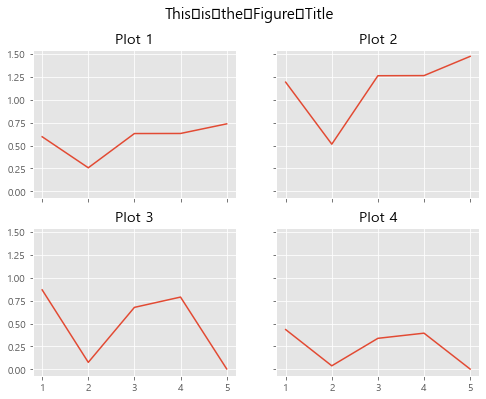

In [9]:
x	=	[1,2,3,4,5]
y1	=	[0.59705847,	0.25786401,	0.63213726,	0.63287317,	0.73791151]
y2	=	[1.19411694,	0.51572803,	1.26427451,	1.26574635,	1.47582302]
y3	=	[0.86793828,	0.07563408,	0.67670068,	0.78932712,	0.0043694]
y4	=	[0.43396914,	0.03781704,	0.33835034,	0.39466356,	0.0021847]

#	전체 subplot의 개수 설정 (2	x	2=	총 4개)
fig,	axes	=	plt.subplots(2,	2,	figsize=(8,	6),	sharex=True,	sharey=True)

#	전체 그래프의 타이틀 설정
fig.suptitle('This	is	the	Figure	Title',	fontsize=15)

#	Top	Left	Subplot
axes[0,0].plot(x,	y1)
axes[0,0].set_title("Plot 1")

#	Top	Right	Subplot
axes[0,1].plot(x,	y2)
axes[0,1].set_title("Plot 2")

#	Bottom	Left	Subplot
axes[1,0].plot(x,	y3)
axes[1,0].set_title("Plot 3")

#	Bottom	Right	Subplot
axes[1,1].plot(x,	y4)
axes[1,1].set_title("Plot 4")
plt.show()

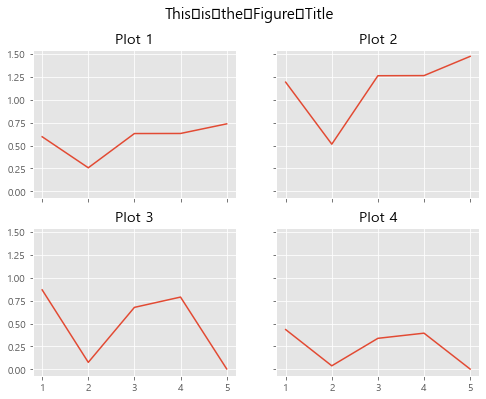

In [10]:
#	전체 subplot의 개수 설정 (2	x	2=	총 4개)
fig,	axes	=	plt.subplots(2,	2,	figsize=(8,	6),	sharex=True,	sharey=True)
#	전체 그래프의 타이틀 설정
fig.suptitle('This	is	the	Figure	Title',	fontsize=15)
#	Top	Left	Subplot
plt.subplot(2,	2,	1)
plt.plot(x,	y1)
plt.title('Plot 1')
#	Top	Right	Subplot
plt.subplot(2,	2,	2)
plt.plot(x,	y2)
plt.title("Plot 2")
#	Bottom	Left	Subplot
plt.subplot(2,	2,	3)
plt.plot(x,	y3)
plt.title("Plot 3")
#	Bottom	Right	Subplot
plt.subplot(2,	2,	4)
plt.plot(x,	y4)
plt.title("Plot 4")
plt.show()

# 9. 나이별 인구 현황(꺾은 선 그래프)

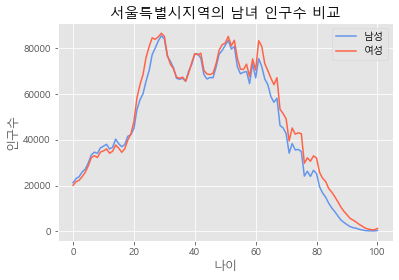

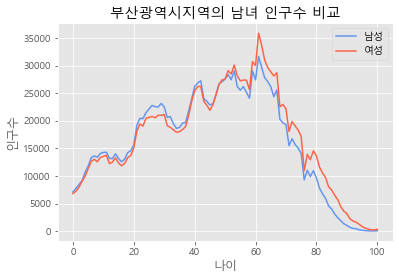

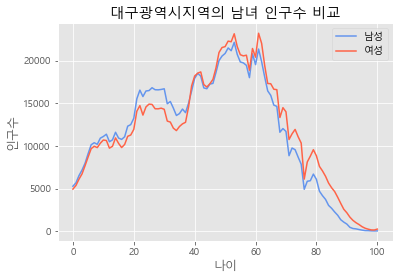

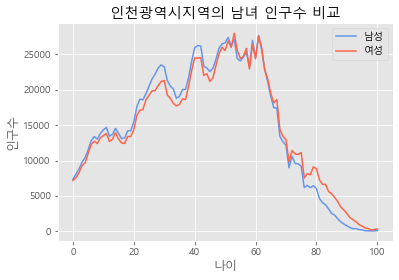

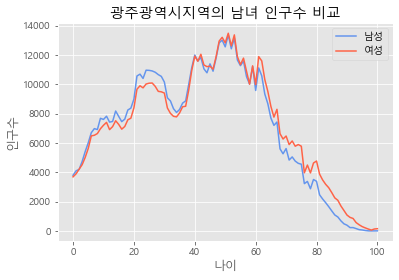

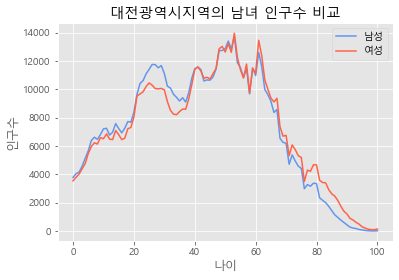

In [23]:
f	=	open(path_gender,	encoding='euc_kr')
data	=	csv.reader(f)

# city	=	input('찾고 싶은 지역의 이름을 입력하세요:	')
city_list = ['서울특별시','부산광역시','대구광역시','인천광역시','광주광역시','대전광역시']

for	city in	city_list:
    male_list =	[]
    female_list =	[]
    for row in data:
        if city	in	row[0]:
            for	i in	range(106,	207):
                male_list.append(int(row[i].replace(',','')))
                female_list.append(int(row[i+103].replace(',','')))
            break		#	도시 하위 목록이 많음.	처음에 나오는 데이터가 전체 총합

    if	platform.system()	==	'Windows':
        plt.rc('font',	family='Malgun Gothic')
    else:
        plt.rc('font',	family='AppleGothic')

    color	=	['cornflowerblue',	'tomato']
    plt.plot(male_list,	label='남성',	color=color[0])
    plt.plot(female_list,	label='여성',	color=color[1])
    plt.title(city	+"지역의 남녀 인구수 비교")
    plt.xlabel('나이')
    plt.ylabel('인구수')
    plt.legend()
    plt.show()

# 10. 제주도의 연령대별 성별 비율 산점도

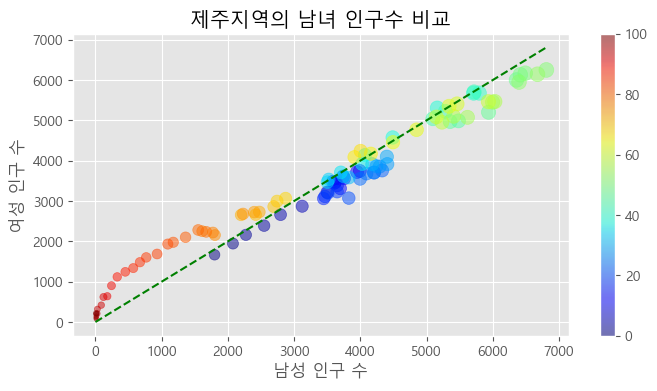

In [32]:
import math

def draw_scatter(city, male_list, female_list, bubble_size_list):
    if	platform.system()	==	'Windows':
        plt.rc('font',	family='Malgun Gothic')
    else:
        plt.rc('font',	family='AppleGothic')
        
    plt.figure(figsize=(8,4), dpi =100)
    plt.scatter(male_list, female_list, s= bubble_size_list, c= range(101), alpha =0.5, cmap='jet')
    plt.colorbar()
    plt.plot(range(max(male_list)), range(max(male_list)), 'g--') # 추세선 
    plt.title(city	+ "지역의 남녀 인구수 비교")
    plt.xlabel('남성 인구 수')
    plt.ylabel('여성 인구 수')
    plt.show()       

def	calculate_population():
    f	=	open(path_gender,	encoding='euc_kr')
    data	=	csv.reader(f)
    male_list =	[]
    female_list =	[]
    bubble_size_list =	[]
    city	=	input('찾고 싶은 지역의 이름을 입력하세요:	')
    
    for	row	in	data:
        if	city	in	row[0]:
            for	i in	range(106,	207):
                male_num =	int(row[i].replace(',',''))
                female_num =	int(row[i +	103].replace(',',''))
                #	버블의 사이즈 조절
                bubble_size_list.append(math.sqrt(male_num +	female_num)) # -> 루트(남,녀) : 버블 크기를 줄여주기 위해
                #bubble_size_list.append(male_num +	female_num)
                male_list.append(male_num)
                female_list.append(female_num)
            break
    f.close()
    draw_scatter(city,	male_list,	female_list,	bubble_size_list)

calculate_population()